In [6]:
import pdfplumber
import re #Need to run for first time use. 

In [10]:
pdf_path="pdfSentenceExtractor-master//pdf_Enero//"
txt_path="pdfSentenceExtractor-master//pdf_txts//"
pdfs=[]
for pdf in os.listdir(pdf_path):
    pdfs.append(pdf)


In [4]:
pdfs

['2020_01_02_A_PLENO.pdf',
 '2020_01_06_A_PLENO.pdf',
 '2020_01_07_A_PLENO.pdf',
 '2020_01_08_A_PLENO.pdf',
 '2020_01_13_V_PLENO.pdf',
 '2020_01_14_V_PLENO.pdf',
 '2020_01_15_A_PLENO.pdf',
 '2020_01_15_V_PLENO.pdf',
 '2020_01_16_A_PLENO.pdf',
 '2020_01_20_V_PLENO.pdf']

In [7]:
for pdf_name in pdfs:
    fullText=""
    pdf_reader=pdfplumber.open("pdfSentenceExtractor-master//pdf_Enero//"+pdf_name)
    if len(pdf_reader.pages) > 3:
        txt_File = open("pdfSentenceExtractor-master//pdf_txts//"+os.path.splitext(pdf_name)[0]+".txt","w+") 
        for page in pdf_reader.pages:
            page=page.crop((1,50,612,715)) #Delete the footer and page numbers. 
            fullText=fullText+page.extract_text()
            
        final_sentences=re.findall(r'\—[A-Z\sÑ\.\,ÁÉÍÓÚ]*([A-Z\sÑ\.\,ÁÉÍÓÚ][a-zA-Z\s\.\…áéíóúÁÉÍÓÚ\,\¿\?ñÑ0-9\'\"\“\”\:\;\-]*)',fullText)  
        for sentence in final_sentences:
            txt_File.write(sentence)
        txt_File.close()
    else:
        print(pdf_name+" no mayor a 3 páginas.")


2020_01_14_V_PLENO.pdf no mayor a 3 páginas.
2020_01_15_V_PLENO.pdf no mayor a 3 páginas.


In [23]:
docs=[]
txtNames=[]
for txtName in os.listdir(txt_path):
    txtNames.append(txtName)

for txtName in txtNames:
    txtFile=open("pdfSentenceExtractor-master//pdf_txts//"+txtName)
    txtFile.seek(0)
    docs.append(txtFile.read())
    txtFile.close()
    

In [27]:
len(docs)

8

In [48]:
#BlackList de palabaras que no queremos que se consideren en el topic Modeling. 
black_list=['diputado','secretario','punto','día','dia','acta','sesion','honorable','señor','periodo','sesiones','presidente','presidenta','sesion','sesiones','correspondencia','orden','pleno'] #Faltan por agregar.

In [29]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import gensim
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary

In [ ]:
Función Cleaner. 

In [42]:
def cleaner(word):
  word = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', word, flags=re.MULTILINE)#Direcciones Web. 
  word = re.sub(r'\#\.', '', word)#Numerales seguidos de puntos.
  word = re.sub(r'\n', '', word)#Saltos de linea
  word = re.sub(r',','', word)#Comas
  word = re.sub(r'\-', ' ', word)#Guiones.
  word = re.sub(r'\.{3}', ' ', word)#Puntos suspensivos.
  word = re.sub(r'á', 'a', word)#tildes.
  word = re.sub(r'é', 'e', word)
  word = re.sub(r'í', 'i', word)
  word = re.sub(r'ó', 'o', word)
  word = re.sub(r'ú', 'u', word) 
  word = re.sub(r'a{2,}', 'a', word)#Dos o más a seguidas -->a 
  word = re.sub(r'e{2,}', 'e', word)#Dos o más e seguidas -->a 
  word = re.sub(r'i{2,}', 'i', word)#Dos o más i seguidas -->a 
  word = re.sub(r'o{2,}', 'o', word)#Dos o más o seguidas -->a 
  word = re.sub(r'u{2,}', 'u', word)#Dos o más u seguidas -->a 
  word = re.sub(r'ja{2,}', 'ja', word)#Jajaja -->ja  
  word = re.sub('[^a-zA-Z]', ' ', word)#Todo lo que no sea palabras. 
  list_word_clean = []
  for w1 in word.split(" "):
    if  w1.lower() not in stopwords:
      list_word_clean.append(w1.lower())

  bigram_list = bigram[list_word_clean]
  out_text = lemmatization(" ".join(bigram_list))
  return out_text

In [49]:
#Solo queremos los sustantivos, eliminamos adverbios, adjetivos y verbos. (Con Spacy)
def lemmatization(texts, allowed_postags=['NOUN']):
    texts_out = [ token.text for token in nlp(texts) if token.pos_ in 
                 allowed_postags and token.text not in black_list and len(token.text)>2]
    return texts_out

In [31]:
#Busquemos bigram, para encontrar pares de palabaras que juntan tienen más significado. 
bigram = gensim.models.Phrases(docs) 

In [41]:
len(bigram[docs[0].split()])

4646

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josea\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))

additional_stopwords=set(black_list)

stopwords = stop.union(additional_stopwords)

In [38]:
import spacy
nlp = spacy.load('es_core_news_md') 

In [54]:
#Testing the cleaner
len(cleaner(docs[7])) 

3420

In [59]:
#Cleaner is working Properly. Ahora con todos los docs.
docsCleaned=[]
for doc in docs:
    docsCleaned.append(cleaner(doc))

In [61]:
#

dictionary.compactify()
# Filter extremes
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()

corpus = [dictionary.doc2bow(text) for text in df_news['text'].to_list()]

8

In [62]:
#Lo que haremos ahora es crear un diccionario que necesita Gensim para trabajar, básicamente es una lista de lista de tokens. 
dictionary = Dictionary(docsCleaned) 

In [71]:
for x, y in dictionary.items():
    print(str(x)+"--"+y)

0--abandonandonos
1--acceso
2--acciones
3--acogerlos
4--activos
5--acuerdo
6--agradecimiento
7--agro
8--agua
9--ajustes
10--alimentos
11--amigos
12--analfabetismo
13--anos
14--anteproyectos
15--anuncio
16--arena
17--arte
18--artes
19--asamblea
20--asistencia
21--asociaciones
22--autonomia
23--autoridades
24--avance
25--ayuda
26--banda
27--bendiciones
28--beneficio
29--bienestar
30--bloque
31--calendario
32--calidad
33--calor
34--cambio
35--cambios
36--camino
37--campo
38--canto
39--capacidad
40--carga
41--carne
42--casa
43--certeza
44--cifras
45--circuitos
46--citaciones
47--ciudadano
48--ciudadanos
49--ciudades
50--clases
51--cobertura
52--colegas
53--comision
54--comisiones
55--complacencia
56--complejidades
57--compromiso
58--comunicacion
59--conciencia
60--concurrencia
61--confianza
62--conjunto
63--consecuencias
64--consideracion
65--consumo
66--contacto
67--contratistas
68--convertirse
69--corazones
70--corrientes
71--cortesias
72--cosas
73--creador
74--crecimiento
75--credibilid

In [73]:
dictionary.compactify()#Da nuevos ID. 
#Filtramos palabras que estén en minimo 2 documentos y máximo el 97% de documentos. 
dictionary.filter_extremes(no_below=2, no_above=0.97, keep_n=None)
dictionary.compactify()
#Creamos el Corpus
corpus = [dictionary.doc2bow(text) for text in docsCleaned]

In [80]:
len(corpus) #Bag of words Formato: List of (token_id,token_count) tuple. 

8

In [100]:
#Modeling Part, intentaremos 3 tipos de modelos para ver cual produce mejor resultado. 
#Primer modelo HDP= Hierarchical Dirichlet process
hdpmodel=HdpModel(corpus=corpus,id2word=dictionary,random_state=30)

In [85]:
#Función para mostrar los temas. 
def display_topics(model, model_type="lda"):
  for topic_idx, topic in enumerate(model.print_topics()):
    print ("Topic %d:" % (topic_idx))
    if model_type== "hdp":
      print (" ".join(re.findall( r'\*(.[^\*-S]+).?', topic[1])), "\n")
    else:
      print (" ".join(re.findall( r'\"(.[^"]+).?', topic[1])), "\n")
    

In [101]:
display_topics(hdpmodel,model_type="hdp")

Topic 0:
proyecto  parte  ministro  debate  momento  empresa  tardes  nivel  miembro  anteproyecto 

Topic 1:
proyecto  debate  parte  ministro  recursos  nivel  tardes  momento  ejemplo  provincia 

Topic 2:
proyecto  debate  jueves  tardes  casos  pueblo  discurso  nivel  incidencias  desastre 

Topic 3:
proyecto  debate  parte  tipo  informe  transporte  materia  edad  efecto  vehiculos 

Topic 4:
proyecto  debate  problemas  incidencias  uso  alcalde  minutos  distrito  comunidades  informe 

Topic 5:
acciones  pueblo  padre  justicia  desarrollo  informe  casa  legislatura  tarea  grupos 

Topic 6:
verdades  medicinas  desafios  empresario  serie  giro  incertidumbre  arte  centavos  riesgo 

Topic 7:
pueblos  repente  sugerencia  estructura  precios  ejecutivo  nutricion  designaciones  distrito  inteligencia 

Topic 8:
manejo  ministros  dolor  entrega  oficiales  capacidades  movimientos  politicas  productor  familias 

Topic 9:
conveniencia  circuitos  competencia  vulnerabil

In [96]:
#Segundo modelo Lsi= Latent semantic analysis
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)

In [97]:
display_topics(lsimodel)

Topic 0:
proyecto debate parte ministro tardes momento nivel empresa anteproyecto miembro 

Topic 1:
proyecto ambiente momento parte acceso nivel ministro propuestas diabetes debate 

Topic 2:
miembro acceso recursos notarias habitantes junta voto provincia empresa centros 

Topic 3:
salario proyecto corregimientos sector debate equipo uso incidencias trabajadores nivel 

Topic 4:
debate recursos transporte ejemplo miembro empresa junta vehiculos informe normas 

Topic 5:
jueves pueblo parte tipo desastre incidencias discurso casos marzo tardes 

Topic 6:
problemas incidencias alcalde distrito minutos tipo transporte comunidades sanciones anteproyecto 

Topic 7:
acciones padre informe justicia pueblo casa tarea instituciones legislatura julio 



In [94]:
#Tercer modelo lda = Laten Dirichlet Allotacion Model
ldamodel= LdaModel(corpus=corpus,num_topics=10,id2word=dictionary)

In [95]:
display_topics(ldamodel)

Topic 0:
proyecto parte debate ministro nivel provincia acceso tardes recursos anteproyecto 

Topic 1:
proyecto debate tardes empresa momento parte miembro nivel ministro tipo 

Topic 2:
proyecto debate parte momento pueblo nivel acceso uso anteproyecto incidencias 

Topic 3:
proyecto debate ministro tardes momento parte nivel desarrollo uso pueblo 

Topic 4:
proyecto debate parte ministro nivel tardes momento empresa tipo miembro 

Topic 5:
proyecto parte debate acceso momento tardes anteproyecto incidencias nivel pueblo 

Topic 6:
proyecto debate parte nivel momento ministro tardes empresa fin tipo 

Topic 7:
proyecto debate parte ministro tardes tipo nivel empresa provincia recursos 

Topic 8:
proyecto debate momento parte anteproyecto nivel ministro tardes recursos informe 

Topic 9:
proyecto debate parte ministro tardes momento nivel incidencias fin tipo 



In [102]:
#Get the topics from each model.
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

hdptopics = [[word for word, prob in topic] for topicid, topic in hdpmodel.show_topics(formatted=False)]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(formatted=False)]

In [106]:
hdptopics

[['proyecto',
  'parte',
  'ministro',
  'debate',
  'momento',
  'empresa',
  'tardes',
  'nivel',
  'miembro',
  'anteproyecto',
  'acceso',
  'funcionarios',
  'junta',
  'cantidad',
  'ambiente',
  'circuito',
  'provincia',
  'embargo',
  'salario',
  'sector'],
 ['proyecto',
  'debate',
  'parte',
  'ministro',
  'recursos',
  'nivel',
  'tardes',
  'momento',
  'ejemplo',
  'provincia',
  'tipo',
  'anteproyecto',
  'empresa',
  'dolares',
  'incidencias',
  'uso',
  'acceso',
  'pueblo',
  'desarrollo',
  'disposiciones'],
 ['proyecto',
  'debate',
  'jueves',
  'tardes',
  'casos',
  'pueblo',
  'discurso',
  'nivel',
  'incidencias',
  'desastre',
  'acceso',
  'partido',
  'marzo',
  'reformas',
  'fin',
  'agua',
  'errores',
  'ministro',
  'mensaje',
  'transporte'],
 ['proyecto',
  'debate',
  'parte',
  'tipo',
  'informe',
  'transporte',
  'materia',
  'edad',
  'efecto',
  'vehiculos',
  'autoridad',
  'disposiciones',
  'transito',
  'pena',
  'manejo',
  'vehiculo'

In [108]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=docsCleaned, dictionary=dictionary, window_size=10).get_coherence()
hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=docsCleaned, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=ldatopics, texts=docsCleaned, dictionary=dictionary, window_size=10).get_coherence()

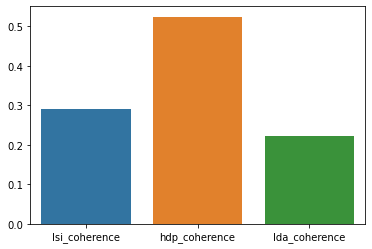

In [112]:
import seaborn as sns

coherences = [lsi_coherence, hdp_coherence, lda_coherence]
n = len(coherences)
x = ['lsi_coherence','hdp_coherence', 'lda_coherence']
sns.barplot(x, coherences)

In [115]:
def format_topics_sentences(ldamodel=0, corpus=corpus, texts=0):
    # Init output
    sent_topics_df = pd.DataFrame()-n

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


result = format_topics_sentences(ldamodel, corpus=corpus, texts=docsCleaned)


In [116]:
result

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,3.0,0.5963,"proyecto, debate, ministro, tardes, momento, p...","[legislatura, ordinarias, jueves, enero, lectu..."
1,9.0,0.9989,"proyecto, debate, parte, ministro, tardes, mom...","[lunes, enero, jueves, octubre, consideracion,..."
2,0.0,0.6543,"proyecto, parte, debate, ministro, nivel, prov...","[martes, enero, lunes, enero, incidencias, deb..."
3,2.0,0.8558,"proyecto, debate, parte, momento, pueblo, nive...","[enero, martes, enero, incidencias, debate, pr..."
4,4.0,0.5219,"proyecto, debate, parte, ministro, nivel, tard...","[lunes, enero, enero, incidencias, asamblea, m..."
5,9.0,0.9988,"proyecto, debate, parte, ministro, tardes, mom...","[enero, lunes, martes, enero, incidencias, deb..."
6,9.0,0.9988,"proyecto, debate, parte, ministro, tardes, mom...","[jueves, enero, lunes, martes, miercoles, ener..."
7,7.0,0.5552,"proyecto, debate, parte, ministro, tardes, tip...","[lunes, enero, jueves, enero, incidencias, asa..."
